In [3]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib
import seaborn as sns
import yaml
# start = datetime.datetime(2010, 1, 1)
# end = datetime.datetime(2022, 8, 6)
stocks_data = pd.read_csv('data/Stocks_processed.csv', index_col='<DATE>').drop(columns=['Unnamed: 0'])


In [28]:
stocks_data

,CHFUSD_lrr,GOLD_lrr,EURUSD_lrr,BRENT_lrr,GAS_lrr,PL_lrr,RUBUSD_lrr,SPY_lrr
<DATE>,,,,,,,,
03/01/19,0.002473,0.004094,0.004652,0.015786,0.004803,0.009322,0.003656,-0.025068
04/01/19,0.001284,-0.008516,0.000377,0.033109,0.037284,0.022267,0.013339,0.033759
07/01/19,0.006982,-0.006752,0.006802,-0.003641,0.010373,-0.009521,0.015553,0.006986
08/01/19,-0.001765,-0.000545,-0.003194,0.017562,-0.001666,0.000968,-0.004553,0.009649
09/01/19,0.008212,0.010618,0.009907,0.045868,-0.003675,0.005189,0.002413,0.004090
...,...,...,...,...,...,...,...,...
27/12/21,0.001928,0.002761,0.000574,0.032578,0.029549,-0.001651,-0.000736,0.013744
28/12/21,0.000028,-0.003315,-0.001457,0.002541,-0.001224,0.009456,-0.003687,-0.001011
29/12/21,0.003553,-0.001107,0.004049,0.004810,-0.054108,-0.009973,-0.004888,0.001401


<AxesSubplot:title={'center':'S&P 500 daily log returns'}, xlabel='<DATE>'>

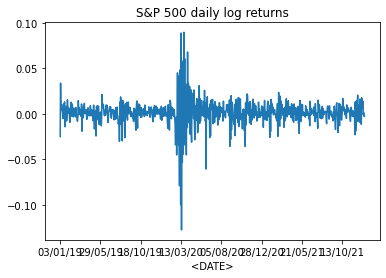

In [29]:
stocks_data['SPY_lrr'].plot(title='S&P 500 daily log returns')

In [30]:
small_pop = stocks_data['SPY_lrr'].dropna().sample(n=10)
big_pop = stocks_data['SPY_lrr'].dropna().sample(n=600)

In [31]:
print('small_pop mean:', np.mean(small_pop))
print('small_pop standard deviation:',np.std(small_pop))
print('big_pop mean:', np.mean(big_pop))
print('big_pop standard deviation:',np.std(big_pop))



small_pop mean: 0.006882737947703259
small_pop standard deviation: 0.013889846941199584
big_pop mean: 0.0011055041562990945
big_pop standard deviation: 0.01454115405882506


In [32]:
spy_log_return  = stocks_data['SPY_lrr'].dropna()

In [33]:
bottom_1 = np.mean(spy_log_return.tail(10))-1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
upper_1 = np.mean(spy_log_return.tail(10))+1.96*np.std(spy_log_return.tail(10))/(np.sqrt(len((spy_log_return.tail(10)))))
bottom_2 = np.mean(spy_log_return.tail(600))-1.96*np.std(spy_log_return.tail(600))/(np.sqrt(len((spy_log_return.tail(600)))))
upper_2 = np.mean(spy_log_return.tail(600))+1.96*np.std(spy_log_return.tail(600))/(np.sqrt(len((spy_log_return.tail(600)))))
#print the outcomes
print('10 days 95% confidence inverval:', (bottom_1,upper_1))
print('600 days 95% confidence inverval:', (bottom_2,upper_2))


10 days 95% confidence inverval: (-0.003663232590257857, 0.007797414777982837)
600 days 95% confidence inverval: (-0.0003711872073257537, 0.0020880825781114994)


# Проверка гипотезы о среднем
Мы посмотрели на график log daily returns и предположили, что среднее для всег SPY –  0

Cначала давайте проверим через доверительные интервалы 

In [34]:
mean_600 = np.mean(spy_log_return.tail(600))
std_600 = np.std(spy_log_return.tail(600))
mean_10 = np.mean(spy_log_return.tail(10))
std_10 = np.std(spy_log_return.tail(10))
s = pd.Series([mean_10,std_10,mean_600,std_600],index = ['mean_10', 'std_10','mean_600','std_600'])
print(s)

mean_10     0.002067
std_10      0.009245
mean_600    0.000858
std_600     0.015367
dtype: float64


Видим, что наше выборочное среднее попало в 90% доверительный интервал

In [35]:
bottom = 0 - 1.64*std_600/np.sqrt(600)
upper = 0 + 1.64*std_600/np.sqrt(600)
print((bottom, upper))

(-0.001028878175540075, 0.001028878175540075)


In [36]:
bottom = 0 - 1.96*std_600/np.sqrt(600)
upper = 0 + 1.96*std_600/np.sqrt(600)
print((bottom, upper))

(-0.0012296348927186265, 0.0012296348927186265)


Но попало в 95%

Теперь давайте проведём Z-test
$$
H_0: \mu = 0 \\
H_1: \mu \neq 0
$$

In [37]:
z_crit = (np.sqrt(600)*(mean_600 - 0)/std_600)


In [38]:
import scipy.stats as st
print((1 - st.norm.cdf(z_crit)))

0.0856029835955473


При среднем размере выборки нулевая гипотеза принимается

In [39]:
mean_all = np.mean(spy_log_return)
std_all = np.std(spy_log_return)
z_score = np.sqrt(len(spy_log_return))*(mean_all - 0)/std_all
print('z-score = ',z_score)
p_value = (1 - st.norm.cdf(z_score))
print('p_value = ',p_value)

z-score =  1.6396762988672502
p_value =  0.050536244731918756


При большем объёме выборки видим, что нулевая гипотеза cнова принимается на уровне значимости 0.95 и даже 0.9

Все рассмотренные тесты так же есть и в модуле statsmodels.stats

In [40]:
from statsmodels.stats import weightstats as stests
ztest ,pval = stests.ztest(spy_log_return, value=0, alternative='two-sided')
print(pval)
if pval<0.025:
    print("mean is not 0")
else:
    print("mean is 0")

0.10129836417233666
mean is 0


## Некоторые другие тесты для

<AxesSubplot:>

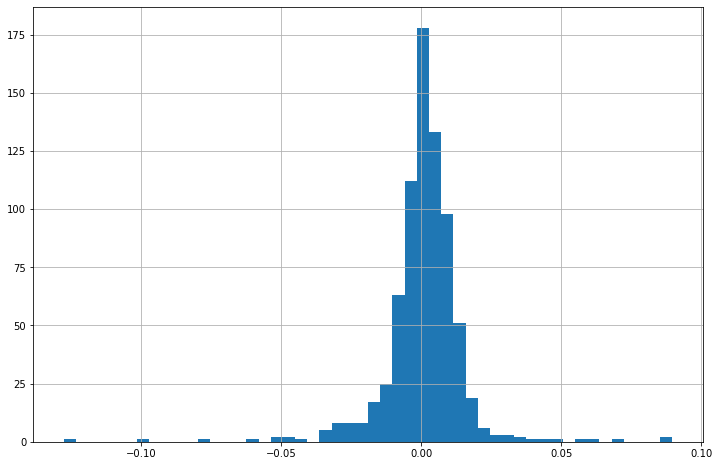

In [41]:
spy_log_return.hist(bins=50, figsize=(12,8))

In [42]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro
stat, p = shapiro(spy_log_return)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

stat=0.792, p=0.000
Probably not Gaussian


In [43]:
stocks_data

,CHFUSD_lrr,GOLD_lrr,EURUSD_lrr,BRENT_lrr,GAS_lrr,PL_lrr,RUBUSD_lrr,SPY_lrr
<DATE>,,,,,,,,
03/01/19,0.002473,0.004094,0.004652,0.015786,0.004803,0.009322,0.003656,-0.025068
04/01/19,0.001284,-0.008516,0.000377,0.033109,0.037284,0.022267,0.013339,0.033759
07/01/19,0.006982,-0.006752,0.006802,-0.003641,0.010373,-0.009521,0.015553,0.006986
08/01/19,-0.001765,-0.000545,-0.003194,0.017562,-0.001666,0.000968,-0.004553,0.009649
09/01/19,0.008212,0.010618,0.009907,0.045868,-0.003675,0.005189,0.002413,0.004090
...,...,...,...,...,...,...,...,...
27/12/21,0.001928,0.002761,0.000574,0.032578,0.029549,-0.001651,-0.000736,0.013744
28/12/21,0.000028,-0.003315,-0.001457,0.002541,-0.001224,0.009456,-0.003687,-0.001011
29/12/21,0.003553,-0.001107,0.004049,0.004810,-0.054108,-0.009973,-0.004888,0.001401


In [44]:
# Anova Test
from scipy import stats
from statsmodels.stats import weightstats as stests
F, p = stats.f_oneway(stocks_data['SPY_lrr'],stocks_data['GOLD_lrr'], stocks_data['GAS_lrr'])
print("p-value for significance is: ", p)
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

p-value for significance is:  0.8688157804263602
accept null hypothesis


# Correlation test

<AxesSubplot:title={'center':'Gold daily log returns'}, xlabel='<DATE>'>

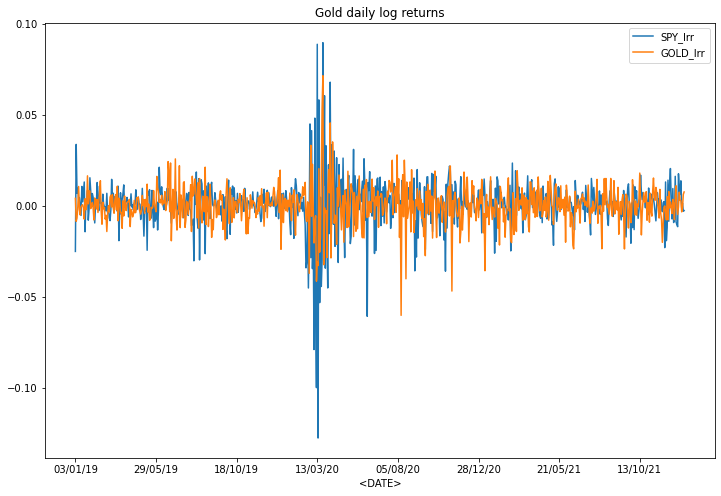

In [45]:
stocks_data['SPY_lrr'].plot(title='S&P 500 daily log returns', legend=True, figsize=(12,8))
stocks_data['GOLD_lrr'].plot(title='Gold daily log returns', legend=True, figsize=(12,8))

In [46]:
from scipy.stats.stats import pearsonr
corr, p = pearsonr(stocks_data['SPY_lrr'],stocks_data['GOLD_lrr'])
print("p-value for significance is: ", p)
print("correlation is: ", corr)


p-value for significance is:  3.314217905407808e-05
correlation is:  0.1503503306907676


## Проверка связи двух категориальных признаков

In [47]:
df = pd.DataFrame({'Order': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                            11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
                   'Product': ['TV', 'TV', 'Comp', 'TV', 'TV', 'Comp',
                               'Comp', 'Comp', 'TV', 'Radio', 'TV', 'Radio', 'Radio',
                               'Radio', 'Comp', 'Comp', 'TV', 'TV', 'Radio', 'TV'],
                   'Country': ['A', 'A', 'A', 'A', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
                               'B', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']})

In [48]:
from scipy.stats import chi2_contingency

table = pd.crosstab(index=df['Country'], columns=df['Product'])
stat, p, dof, expected = chi2_contingency(table)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably independent')
else:
	print('Probably dependent')

stat=2.750, p=0.600
Probably independent


# Теперь давайте сами

In [49]:
aapl_stock_price_data = web.DataReader('AAPL', 'yahoo', '2014-09-17', '2022-08-06')

In [50]:
btc_price_data = web.DataReader('BTC-USD', 'yahoo', '2010-01-01', '2022-08-06')
btc_price_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-17,468.174011,452.421997,465.864014,457.334015,21056800,457.334015
2014-09-18,456.859985,413.104004,456.859985,424.440002,34483200,424.440002
2014-09-19,427.834991,384.532013,424.102997,394.795990,37919700,394.795990
2014-09-20,423.295990,389.882996,394.673004,408.903992,36863600,408.903992
2014-09-21,412.425995,393.181000,408.084991,398.821014,26580100,398.821014
...,...,...,...,...,...,...
2022-08-03,23578.650391,22747.835938,22981.302734,22846.507812,26288169966,22846.507812
2022-08-04,23198.009766,22485.701172,22848.214844,22630.957031,25120229769,22630.957031
2022-08-05,23422.828125,22612.177734,22626.833984,23289.314453,28881249043,23289.314453


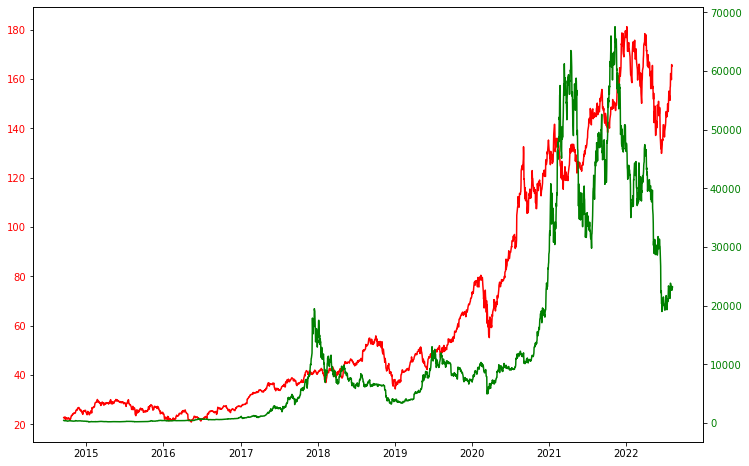

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))

# Plot linear sequence, and set tick labels to the same color
ax.plot(aapl_stock_price_data['Adj Close'], color='red')
ax.tick_params(axis='y', labelcolor='red')

# Generate a new Axes instance, on the twin-X axes (same position)
ax2 = ax.twinx()

# Plot exponential sequence, set scale to logarithmic and change tick color
ax2.plot(btc_price_data['Adj Close'], color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.show()

In [52]:
# на основе Adj Close извлеките логарифмическую доходность BTC task1, ответ – мю и сигма +
# проверьте распределение получившихся данных BTC task2, ответ yes/no  +
# возмонжо попробуйте их (BTC) нормализовать task3, ответ – mu и sigma +
# попробуйте предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99 – task 4, ответ – val + [a;b] +
# проверьте корреляцию доходностей BTC & AAPL – task5, ответ – yes/no + 

## Task 1. На основе Adj Close извлеките логарифмическую доходность BTC

In [53]:
btc_lrr = np.log(btc_price_data['Adj Close']/btc_price_data['Adj Close'].shift(1)).dropna()

In [54]:
btc_lrr_mean = np.mean(btc_lrr)
btc_lrr_std = np.std(btc_lrr)
btc_size = btc_lrr.shape[0]
print('Answer1 - mean %.4f and std %.4f' % (btc_lrr_mean, btc_lrr_std))
(btc_lrr_mean, btc_lrr_std)

Answer1 - mean 0.0014 and std 0.0391


(0.0013625316939291337, 0.0390704935495444)

## Task 2. Проверьте распределение получившихся данных BTC

<AxesSubplot:title={'center':'BTC log returns'}, xlabel='Date'>

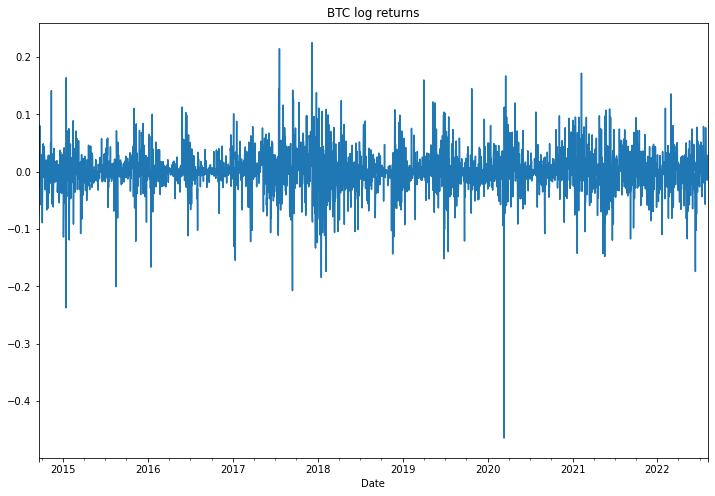

In [55]:
btc_lrr.plot(title='BTC log returns', figsize=(12,8))

In [56]:
bottom = 0 - 1.64*btc_lrr_std/np.sqrt(btc_size)
upper = 0 + 1.64*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('90 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
90 percent interval (-0.0012,0.0012)


Не входит в 90% интервал

In [57]:
bottom = 0 - 1.96*btc_lrr_std/np.sqrt(btc_size)
upper = 0 + 1.96*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('95 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
95 percent interval (-0.0014,0.0014)


Но входит в 95% интервал и, соответственнно, 99% интервал.

In [58]:
bottom = 0 - 2.34*btc_lrr_std/np.sqrt(btc_size)
upper = 0 + 2.34*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('99 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
99 percent interval (-0.0017,0.0017)


Проверка с помощью z-критерия, Шапиро-Уилка, Колмогорова-Смирнова

### Z-test

In [59]:
import scipy.stats as st
z_crit = (np.sqrt(btc_size)*(btc_lrr_mean - 0)/btc_lrr_std)
p_value = 1 - st.norm.cdf(z_crit)
print("z-crit %.4f and p-value %.4f" %(z_crit, p_value))
if p_value > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Z-test
z-crit 1.8718 and p-value 0.0306
Probably not Gaussian


### Шапиро-Уилка

In [60]:
from scipy.stats import shapiro
stat, p = shapiro(btc_lrr)
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Shapiro
stat=0.9083, p=0.0000
Probably not Gaussian


### Колмогорова-Смирнова

In [61]:
from scipy.stats import kstest
stat, p = kstest(btc_lrr, 'norm')
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
	print('Probably Gaussian')
else:
	print('Probably not Gaussian')

Kolmogorov
stat=0.4478, p=0.0000
Probably not Gaussian


Все они дают ответ нет. Следовательно ответ на данную задачу - Нет.

## Task 3. Нормализация данных(BTC)

In [63]:
btc_lrr_normalize = ((btc_lrr - btc_lrr_mean) / btc_lrr_std).dropna()
btc_lrr_normalize_mean = np.mean(btc_lrr_normalize)
btc_lrr_normalize_std = np.std(btc_lrr_normalize)

print('Mean %.4f and Std %.4f' % (btc_lrr_normalize_mean, btc_lrr_normalize_std))

Mean -0.0000 and Std 1.0000


## Task 4. Предположить по подвыборке размером 634 дней среднее значение для доходностей (BTC) на уровне 90 95 99

In [96]:
btc_lrr_634 = btc_lrr.sample(634)
btc_lrr_634_mean = np.mean(btc_lrr_634)
btc_lrr_634_std = np.std(btc_lrr_634)

### 90% интервал

In [106]:
bottom = btc_lrr_634_mean - 1.64*btc_lrr_std/np.sqrt(btc_size)
upper = btc_lrr_634_mean + 1.64*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('90 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
90 percent interval (0.0017,0.0041)
0.0016685768792013148 0.0040561193840300104


0.0013625316939291337

### 95% интервал

In [102]:
bottom = btc_lrr_634_mean - 1.96*btc_lrr_std/np.sqrt(btc_size)
upper = btc_lrr_634_mean + 1.96*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('95 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
95 percent interval (0.0014,0.0043)
0.0014356459031204661 0.004289050360110859


но в 95% интервал входит

### 99% интервал

In [107]:
bottom = btc_lrr_634_mean - 2.58*btc_lrr_std/np.sqrt(btc_size)
upper = btc_lrr_634_mean + 2.58*btc_lrr_std/np.sqrt(btc_size)
print('btc mean %.4f' % btc_lrr_mean)
print('99 percent interval (%.4f,%.4f)' % (bottom, upper))

btc mean 0.0014
99 percent interval (0.0010,0.0047)
0.0009843421369638225 0.004740354126267503


## Task 5. Проверьте корреляцию доходностей BTC & AAPL

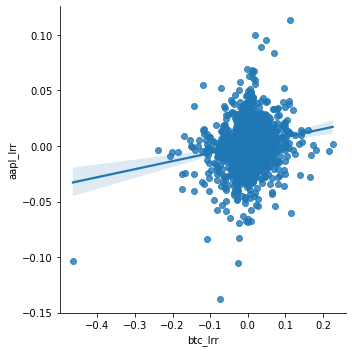

In [87]:
aapl_lrr = np.log(aapl_stock_price_data['Adj Close']/aapl_stock_price_data['Adj Close'].shift(1))
data = pd.concat([aapl_lrr.rename('aapl_lrr'), btc_lrr.rename('btc_lrr')], axis=1).dropna()
sns.lmplot(data=data, x='btc_lrr', y='aapl_lrr')

In [89]:
from scipy.stats.stats import pearsonr
corr, p = pearsonr(data.aapl_lrr, data.btc_lrr)
print("correlation is: ", corr)

correlation is:  0.16567101709243512


Корелляции нет.

In [1]:
ANSWERS = {
    'tasks' : {
        'task1_mu' : {
            "answer" : 0.0013625316939291337
        }, 
        'task1_sigma' : {
            "answer" : 0.0390704935495444
        }, 
        'task2_normal' : {
            'answer' : 'no'
        }, 
        'task3_mu' : {
            "answer" : -3.828554581621288e-17
        }, 
        'task3_sigma' : {
            "answer" : 1.0
        }, 
        'task4_90' : {
            "answer" : 0.0013625316939291337
        }, 
        'task4_90_int' : {
            "answer" : [0.0016685768792013148, 0.0040561193840300104]
        }, 
        'task4_95' : {
            "answer" : 0.0013625316939291337
        }, 
        'task4_95_int' : {
            "answer" : [0.0014356459031204661, 0.004289050360110859]
        }, 
        'task4_99' : {
            "answer" : 0.0013625316939291337
        }, 
        'task4_99_int' : {
            "answer" : [0.0009843421369638225, 0.004740354126267503]
        }, 
        'task5_corr' : {
            "answer" : "no"
        }
    }
}

In [4]:
yaml_result = yaml.dump(ANSWERS)

print(yaml_result)

with open(f"hw03.yaml", "w") as f:
    f.write(yaml_result)

tasks:
  task1_mu:
    answer: 0.0013625316939291337
  task1_sigma:
    answer: 0.0390704935495444
  task2_normal:
    answer: 'no'
  task3_mu:
    answer: -3.828554581621288e-17
  task3_sigma:
    answer: 1.0
  task4_90:
    answer: 0.0013625316939291337
  task4_90_int:
    answer:
    - 0.0016685768792013148
    - 0.0040561193840300104
  task4_95:
    answer: 0.0013625316939291337
  task4_95_int:
    answer:
    - 0.0014356459031204661
    - 0.004289050360110859
  task4_99:
    answer: 0.0013625316939291337
  task4_99_int:
    answer:
    - 0.0009843421369638225
    - 0.004740354126267503
  task5_corr:
    answer: 'no'

